<a href="https://colab.research.google.com/github/Sid-2862/ML9/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means CLustering - Unsupervised Machine Learning algorithm
Clusters are formed on basis of Elucidean distance calculated between each datapoint and centroid

## Evaluation metrics are :
Cluster formation:

## Inertia:
intra cluster distance: within the cluster, the distance between datapoints should be minimal

inter cluster distance: in between the multiple clusters, the distance should be maximum

## Silhoutee score:
the datapoint maintains minimum distance within other datapoints in the cluster and also this datapint maintains maximum distance with other datapoint of other cluster

In [ ]:
%pip install yellowbrick

In [ ]:
%pip install plotly nbformat

In [ ]:
import pandas as pd
path = r"https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/Mall_Customers.csv"
df = pd.read_csv(path)
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.duplicated().sum()

np.int64(0)


## Define X features: These are the features on basis of which clustering should be performed

In [ ]:
x = df.drop(columns=["CustomerID","Genre"])
x.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
x.columns = ["Age","Income","Spending"]

In [ ]:
x.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Data Preprocessing and Data cleaning

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [14]:
con_pipe = make_pipeline(SimpleImputer(strategy="mean"),
                         StandardScaler()).set_output(transform="pandas")

In [15]:
con_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [16]:
x_pre = con_pipe.fit_transform(x)
x_pre.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


## Build the model : k_means

In [17]:
from sklearn.cluster import KMeans

In [18]:
from yellowbrick.cluster import kelbow_visualizer

In [19]:
model = KMeans(n_clusters=5)
model.fit_predict(x_pre)

array([4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 2, 1, 2, 1, 4, 1, 4, 1, 2, 1, 4, 1,
       2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 4,
       2, 1, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 3, 3, 4, 3, 0, 3, 0, 3, 0, 3,
       4, 3, 4, 3, 0, 3, 4, 3, 0, 3, 4, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

## Kelbow_visualizer

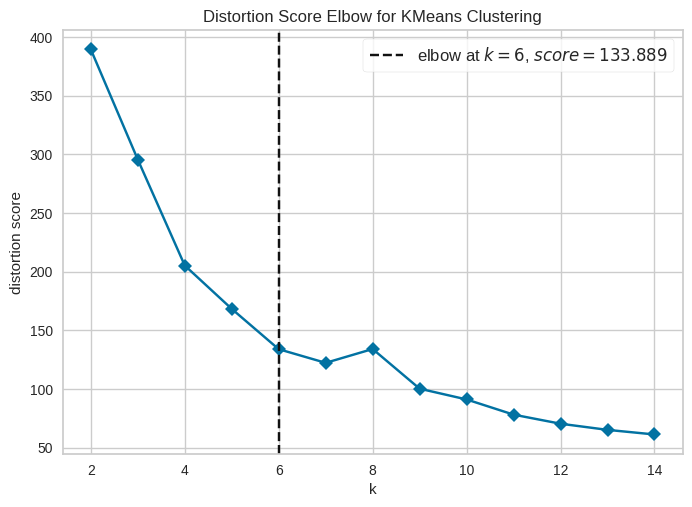

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
base_model = KMeans()
visualizer = kelbow_visualizer(base_model,x_pre,k=(2,15),timings=False)
visualizer.show()

In [21]:
best_kmeans = KMeans(n_clusters=6)
clusters = best_kmeans.fit_predict(x_pre)
clusters

array([0, 0, 5, 0, 0, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 4, 0, 2, 0,
       5, 0, 2, 0, 0, 0, 2, 0, 0, 4, 2, 2, 2, 4, 0, 2, 4, 0, 4, 4, 4, 0,
       2, 4, 0, 0, 4, 2, 4, 4, 4, 0, 2, 2, 0, 2, 4, 2, 4, 2, 0, 2, 4, 0,
       0, 2, 4, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 4, 0, 2, 0, 4, 2, 4, 4,
       4, 0, 2, 0, 0, 0, 4, 2, 2, 2, 0, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [22]:
##  Centroids of each cluster
best_kmeans.cluster_centers_

array([[-1.00776994, -0.76641278,  0.48795716],
       [ 0.05792597,  1.04627858, -1.2811115 ],
       [ 0.5479278 , -0.12547332, -0.15363927],
       [-0.44191719,  0.99158305,  1.23950275],
       [ 1.798408  , -0.28682591,  0.01694032],
       [ 0.52446341, -1.31511764, -1.2725299 ]])

In [23]:
x.head(

)

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [24]:
x["Clusters"] =  clusters
x.head()

,Age,Income,Spending,Clusters
0,19,15,39,0
1,21,15,81,0
2,20,16,6,5
3,23,16,77,0
4,31,17,40,0


In [26]:
for i in range(6):
  print(f"Details of clusters{i}")
  display(x[x["Clusters"]==i])
  print("---------------------------------")

Details of clusters0


,Age,Income,Spending,Clusters
0,19,15,39,0
1,21,15,81,0
3,23,16,77,0
4,31,17,40,0
5,22,17,76,0
7,23,18,94,0
9,30,19,72,0
11,35,19,99,0
13,24,20,77,0
15,22,20,79,0


---------------------------------
Details of clusters1


,Age,Income,Spending,Clusters
124,23,70,29,1
128,59,71,11,1
130,47,71,9,1
132,25,72,34,1
134,20,73,5,1
136,44,73,7,1
138,19,74,10,1
140,57,75,5,1
142,28,76,40,1
144,25,77,12,1


---------------------------------
Details of clusters2


,Age,Income,Spending,Clusters
42,48,39,36,2
46,50,40,55,2
50,49,42,52,2
54,50,43,45,2
55,47,43,41,2
56,51,44,50,2
59,53,46,46,2
66,43,48,50,2
71,47,49,42,2
76,45,54,53,2


---------------------------------
Details of clusters3


,Age,Income,Spending,Clusters
123,39,69,91,3
125,31,70,77,3
127,40,71,95,3
129,38,71,75,3
131,39,71,75,3
133,31,72,71,3
135,29,73,88,3
137,32,73,73,3
139,35,74,72,3
141,32,75,93,3


---------------------------------
Details of clusters4


,Age,Income,Spending,Clusters
40,65,38,35,4
53,59,43,60,4
57,69,44,46,4
60,70,46,56,4
62,67,47,52,4
63,54,47,59,4
64,63,48,51,4
67,68,48,48,4
70,70,49,55,4
72,60,50,49,4


---------------------------------
Details of clusters5


,Age,Income,Spending,Clusters
2,20,16,6,5
6,35,18,6,5
8,64,19,3,5
10,67,19,14,5
12,58,20,15,5
14,37,20,13,5
16,35,21,35,5
18,52,23,29,5
20,35,24,35,5
22,46,25,5,5


---------------------------------


## Metrics :
inertia

In [28]:
best_kmeans.inertia_

149.47606630399918

## plot the clusters for this model

In [29]:
import plotly.express as px

In [30]:
fig = px.scatter_3d(data_frame=x,x="Age",y="Income",z="Spending",color="Clusters",symbol="Clusters")
fig.show()